In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt

state_assm_new = pd.read_csv(r"D:\Liling\OneDrive - University of Pittsburgh\master_thesis\rl_v1\data_state\State Assessment.csv")
state_assm_orig = pd.read_csv(r"D:\Liling\OneDrive - University of Pittsburgh\master_thesis\rl_v1\data_state\State_Assessment_orig.csv")

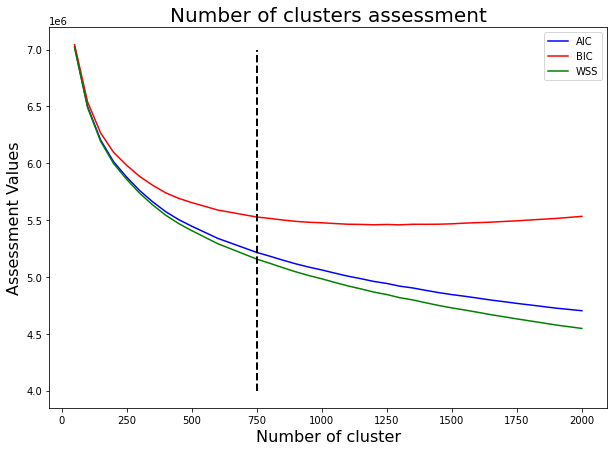

In [3]:
plt.figure(figsize=(10,7))
plt.plot(state_assm_new['Num.States'].tolist(),state_assm_new['AIC'].tolist(),'b',label="AIC")
plt.plot(state_assm_new['Num.States'].tolist(),state_assm_new['BIC'].tolist(),'r',label='BIC')
plt.plot(state_assm_new['Num.States'].tolist(),state_assm_new['Within.State.SSE'].tolist(),'g',label='WSS')
plt.xlabel("Number of cluster",fontsize=16)
plt.ylabel("Assessment Values",fontsize=16)
plt.vlines(x=750,lw=2,ymin =4e+06,ymax=7e+06,color='black',ls='--')
plt.legend()
plt.title(label="Number of clusters assessment",fontsize=20,color="black")
plt.show()

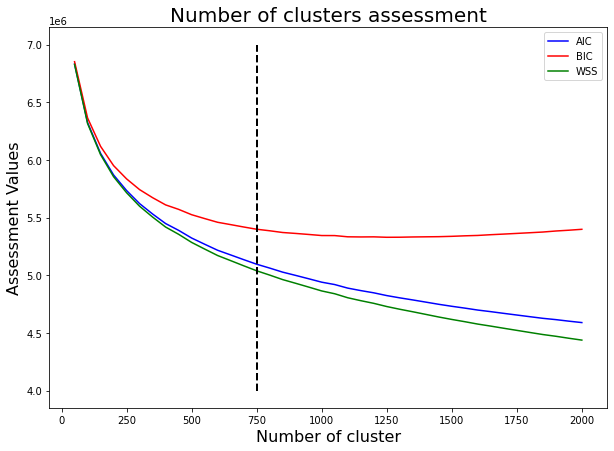

In [4]:
plt.figure(figsize=(10,7))
plt.plot(state_assm_orig['Num.States'].tolist(),state_assm_orig['AIC'].tolist(),'b',label="AIC")
plt.plot(state_assm_orig['Num.States'].tolist(),state_assm_orig['BIC'].tolist(),'r',label='BIC')
plt.plot(state_assm_orig['Num.States'].tolist(),state_assm_orig['Within.State.SSE'].tolist(),'g',label='WSS')
plt.xlabel("Number of cluster",fontsize=16)
plt.ylabel("Assessment Values",fontsize=16)
plt.vlines(x=750,lw=2,ymin =4e+06,ymax=7e+06,color='black',ls='--')
plt.legend()
plt.title(label="Number of clusters assessment",fontsize=20,color="black")
plt.show()

In [5]:
data = pd.read_csv("data\data_cont_vaso_reward.csv")

In [6]:
data_orig = pd.read_stata('data\Sepsis AI - ICU Cohort - Imputed - V1.dta')

In [7]:
data_orig['state']=data.state.tolist()
data_orig['new_state']=data.new_state.tolist()
data_orig['vaso_change']=data.vaso_change.tolist()

In [8]:
feat_list1 = ['sirs_total','gluc','age','map','ast','bili','ph','gender','alt','hgb','base_excess',\
              'weight','sofa_total','wbc', 'gcs','inr','mechvent','rr','cl','sbp','pao2','na','hr','elix',\
              'lactate','pf_ratio','creat','paco2','temp','k','shock_index','o2_sat','bun','plt','fio2',\
              'alb','dbp','bicarb','state']
feat_list2 = ['sirs_total','gluc','age','map','ast','bili','ph','gender','alt','hgb','base_excess',\
              'weight','sofa_total','wbc', 'gcs','inr','mechvent','rr','cl','sbp','pao2','na','hr','elix',\
              'lactate','pf_ratio','creat','paco2','temp','k','shock_index','o2_sat','bun','plt','fio2',\
              'alb','dbp','bicarb','vaso_change','new_state']

In [9]:
data1 = data_orig[feat_list1]
data2 = data_orig[feat_list2]

In [10]:
import seaborn as sns

In [11]:
data1

,sirs_total,gluc,age,map,ast,bili,ph,gender,alt,hgb,...,k,shock_index,o2_sat,bun,plt,fio2,alb,dbp,bicarb,state
0,3.0,171.0,70.0,129.333333,43.0,0.6,7.370,1.0,30.0,12.4,...,4.1,0.506098,91.0,31.0,239.0,60.0,3.0,112.0,26.0,669
1,3.0,167.0,70.0,150.333333,39.0,0.8,7.371,1.0,34.0,12.7,...,4.2,0.539877,96.0,30.0,257.0,60.0,3.0,144.0,28.0,669
2,1.0,155.0,70.0,134.000000,33.0,0.7,7.382,1.0,33.0,13.1,...,3.8,0.494118,95.0,20.0,179.0,60.0,3.2,116.0,29.0,669
3,2.0,139.0,70.0,128.666667,29.0,1.0,7.450,1.0,23.0,13.2,...,2.9,0.494118,95.0,14.0,270.0,60.0,3.5,108.0,27.0,669
4,2.0,139.0,70.0,138.000000,29.0,1.0,7.450,1.0,23.0,13.2,...,2.9,0.548387,94.0,14.0,270.0,60.0,3.5,114.0,27.0,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309835,1.0,178.0,78.0,85.333333,26.0,0.7,7.460,0.0,22.0,8.5,...,3.1,1.089286,98.0,25.0,123.0,40.0,2.7,72.0,34.0,248
309836,0.0,178.0,78.0,72.333333,83.0,1.2,7.410,0.0,40.0,8.5,...,3.1,0.907216,98.0,25.0,123.0,40.0,2.4,60.0,34.0,67
309837,1.0,138.0,78.0,86.000000,17.0,0.7,7.410,0.0,21.0,8.8,...,3.2,0.754098,99.0,18.0,147.0,40.0,2.3,68.0,33.0,67
309838,0.0,151.0,78.0,93.000000,17.0,0.7,7.480,0.0,21.0,8.8,...,3.2,0.570370,100.0,18.0,147.0,40.0,2.3,72.0,33.0,32


In [12]:
def NormalizeData(data):
    return (data - np.mean(data)) / np.std(data) 

In [13]:
data1_norm=data1.groupby(by=["state"]).mean()

In [14]:
data1_norm

,sirs_total,gluc,age,map,ast,bili,ph,gender,alt,hgb,...,temp,k,shock_index,o2_sat,bun,plt,fio2,alb,dbp,bicarb
state,,,,,,,,,,,,,,,,,,,,,
1,3.000000,191.368254,67.577778,86.097354,967.342857,1.261556,7.398778,0.520635,505.657143,10.320000,...,37.443139,4.131746,0.942357,97.845714,47.984127,203.241270,47.349206,2.132381,67.209524,19.318730
2,0.437579,121.612863,60.100883,81.846995,18.949559,0.424061,7.397417,0.428752,16.324086,9.547163,...,36.724408,3.871753,0.694854,93.079445,14.244641,247.534678,40.310214,2.643506,64.751576,27.598108
3,2.842437,132.630252,68.254202,83.504202,38.495798,0.771702,7.396878,0.373950,27.781513,9.997479,...,36.876214,3.890126,1.006976,94.510504,23.630252,254.092437,40.668067,2.193697,66.460084,21.066176
4,2.220290,176.771014,72.924638,90.612560,50.718841,0.771014,7.382875,0.446377,51.000000,10.223188,...,36.874557,4.194783,1.152046,93.514493,43.324638,220.727536,46.924638,2.695072,75.133333,35.527246
5,2.203333,152.523333,47.190000,105.504444,49.573333,0.880033,7.331867,0.786667,45.156667,12.691667,...,37.101556,4.278333,0.669435,88.463000,24.500000,228.503333,92.880000,3.016000,83.610000,29.308000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2.136555,140.976891,60.457983,77.410364,29.065126,0.621534,7.410231,0.449580,26.186975,9.413235,...,36.685994,3.806933,0.908607,94.323529,18.002101,347.470588,43.491597,2.261345,62.222689,30.322479
747,2.748387,190.322581,55.458065,97.622581,316.558065,0.642194,7.311619,0.629032,227.167742,14.214516,...,33.438029,3.913871,0.592591,95.977742,24.567742,210.964516,55.538710,3.103548,78.909677,19.228065
748,0.725460,117.564417,40.432515,104.787321,30.332822,0.643144,7.404848,0.766871,31.843558,12.842025,...,36.763787,3.857975,0.585254,96.417945,12.510736,211.029141,38.786810,3.662423,86.156442,25.343405


In [15]:
data1_norm=NormalizeData(data1_norm)

In [16]:
data1_norm

,sirs_total,gluc,age,map,ast,bili,ph,gender,alt,hgb,...,temp,k,shock_index,o2_sat,bun,plt,fio2,alb,dbp,bicarb
state,,,,,,,,,,,,,,,,,,,,,
1,1.355712,0.619963,0.394281,-0.376135,1.088042,-0.097341,0.487458,0.085259,0.997319,-0.140275,...,0.978984,-0.036416,0.998717,1.008863,0.731239,0.211652,-0.228121,-1.480654,-0.360326,-0.864491
2,-1.909204,-0.699353,-0.278639,-0.655469,-0.278326,-0.486116,0.466048,-0.614485,-0.298600,-0.686559,...,-0.103733,-0.539760,-0.415063,-0.293636,-1.168965,0.934818,-0.657943,-0.106485,-0.543572,0.754366
3,1.154953,-0.490976,0.455159,-0.546557,-0.250166,-0.324736,0.457561,-1.031833,-0.268257,-0.368250,...,0.124952,-0.504190,1.367831,0.097436,-0.640368,1.041884,-0.636091,-1.315804,-0.416198,-0.522815
4,0.362243,0.343879,0.875498,-0.079396,-0.232556,-0.325055,0.237181,-0.480259,-0.206767,-0.208706,...,0.122456,0.085622,2.196495,-0.174748,0.468817,0.497145,-0.254047,0.032154,0.230414,2.304742
5,0.340637,-0.114729,-1.440618,0.899300,-0.234206,-0.274448,-0.565612,2.111240,-0.222242,1.536150,...,0.464413,0.247375,-0.560257,-1.555191,-0.591384,0.624099,2.552124,0.894975,0.862370,1.088700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0.255551,-0.333112,-0.246500,-0.947045,-0.263753,-0.394446,0.667715,-0.455866,-0.272480,-0.781226,...,-0.161600,-0.665251,0.805931,0.046340,-0.957345,2.566443,-0.463678,-1.133933,-0.732107,1.287060
747,1.035119,0.600186,-0.696493,0.381303,0.150444,-0.384856,-0.884271,0.910765,0.259785,2.612584,...,-5.054426,-0.458220,-0.999204,0.498394,-0.587569,0.337747,0.271954,1.130350,0.511950,-0.882219
748,-1.542399,-0.775923,-2.048792,0.852171,-0.261926,-0.384414,0.582996,1.960486,-0.257499,1.642431,...,-0.044412,-0.566433,-1.041117,0.618690,-1.266619,0.338803,-0.750967,2.632898,1.052214,0.313507


In [19]:
data1_norm.columns

Index(['sirs_total', 'gluc', 'age', 'map', 'ast', 'bili', 'ph', 'gender',
       'alt', 'hgb', 'base_excess', 'weight', 'sofa_total', 'wbc', 'gcs',
       'inr', 'mechvent', 'rr', 'cl', 'sbp', 'pao2', 'na', 'hr', 'elix',
       'lactate', 'pf_ratio', 'creat', 'paco2', 'temp', 'k', 'shock_index',
       'o2_sat', 'bun', 'plt', 'fio2', 'alb', 'dbp', 'bicarb'],
      dtype='object')

In [20]:
data1_norm = data1_norm.rename({'sirs_total':"SIRS", 'gluc':"Glucose", 'age':"Age", 'map':"MAP", 'ast':"AST",\
                                'bili':"Bilirubin", 'ph':"Arterial pH", 'gender':"Gender",\
                                'alt':"ALT", 'hgb':"Hemoglobin", 'base_excess':"Base Excess", 'weight':"Weight",\
                                'sofa_total':"SOFA", 'wbc':"WBC count", 'gcs':"GCS", 'inr':"INR",\
                                'mechvent':"Mech Vent", 'rr':"Resp Rate", 'cl':"Chloride", 'sbp':"Systolic BP",\
                                'pao2':"PaO2", 'na':"Sodium", 'hr':"Heart Rate", 'elix':"Elixhauser",'lactate':"Serum Lactate",\
                                'pf_ratio':"PF Ratio", 'creat':"Creatinine", 'paco2':"PaCO2", 'temp':"Temperature",\
                                'k':"Potassium", 'shock_index':"Shock Index",'o2_sat':"SaO2", 'bun':"BUN",\
                                'plt':"Platelets", 'fio2':"FiO2", 'alb':"Albumin", 'dbp':"Diastolic BP",\
                                'bicarb':"Bicarbonate"}, axis=1)

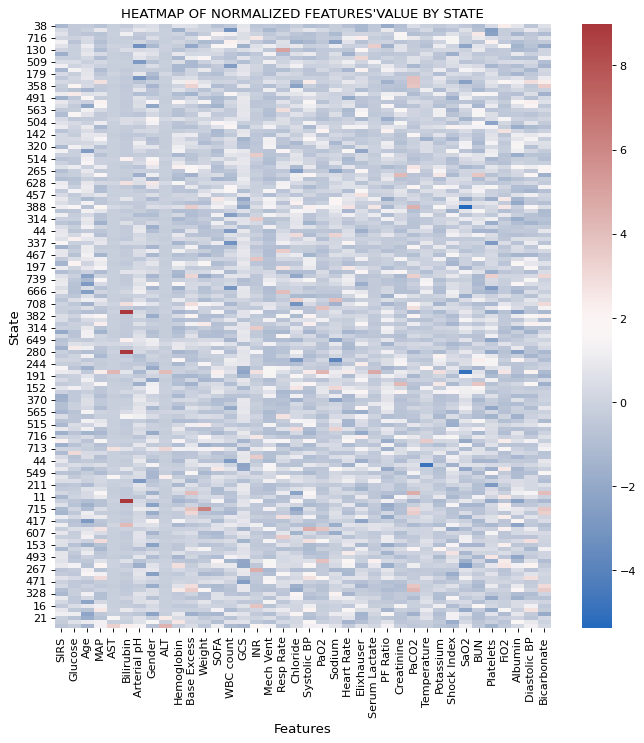

In [21]:
figure(figsize=(10, 10), dpi=80)
#sns.color_palette("vlag", as_cmap=True)
sns.heatmap(data1_norm.sample(frac=0.2, replace=True, random_state=1), cmap="vlag")
plt.xlabel('Features',fontsize=12)
plt.ylabel('State',fontsize=12)
# title
title = "Heatmap of normalized features'value by state".upper()
plt.title(title, loc='center')
plt.show()

In [13]:
data2

,sirs_total,gluc,age,map,ast,bili,ph,gender,alt,hgb,...,shock_index,o2_sat,bun,plt,fio2,alb,dbp,bicarb,vaso_change,new_state
0,3.0,171.0,70.0,129.333333,43.0,0.6,7.370,1.0,30.0,12.4,...,0.506098,91.0,31.0,239.0,60.0,3.0,112.0,26.0,0.00,67
1,3.0,167.0,70.0,150.333333,39.0,0.8,7.371,1.0,34.0,12.7,...,0.539877,96.0,30.0,257.0,60.0,3.0,144.0,28.0,0.00,550
2,1.0,155.0,70.0,134.000000,33.0,0.7,7.382,1.0,33.0,13.1,...,0.494118,95.0,20.0,179.0,60.0,3.2,116.0,29.0,0.00,67
3,2.0,139.0,70.0,128.666667,29.0,1.0,7.450,1.0,23.0,13.2,...,0.494118,95.0,14.0,270.0,60.0,3.5,108.0,27.0,0.00,67
4,2.0,139.0,70.0,138.000000,29.0,1.0,7.450,1.0,23.0,13.2,...,0.548387,94.0,14.0,270.0,60.0,3.5,114.0,27.0,0.00,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309835,1.0,178.0,78.0,85.333333,26.0,0.7,7.460,0.0,22.0,8.5,...,1.089286,98.0,25.0,123.0,40.0,2.7,72.0,34.0,0.00,323
309836,0.0,178.0,78.0,72.333333,83.0,1.2,7.410,0.0,40.0,8.5,...,0.907216,98.0,25.0,123.0,40.0,2.4,60.0,34.0,0.15,464
309837,1.0,138.0,78.0,86.000000,17.0,0.7,7.410,0.0,21.0,8.8,...,0.754098,99.0,18.0,147.0,40.0,2.3,68.0,33.0,0.05,464
309838,0.0,151.0,78.0,93.000000,17.0,0.7,7.480,0.0,21.0,8.8,...,0.570370,100.0,18.0,147.0,40.0,2.3,72.0,33.0,0.00,464


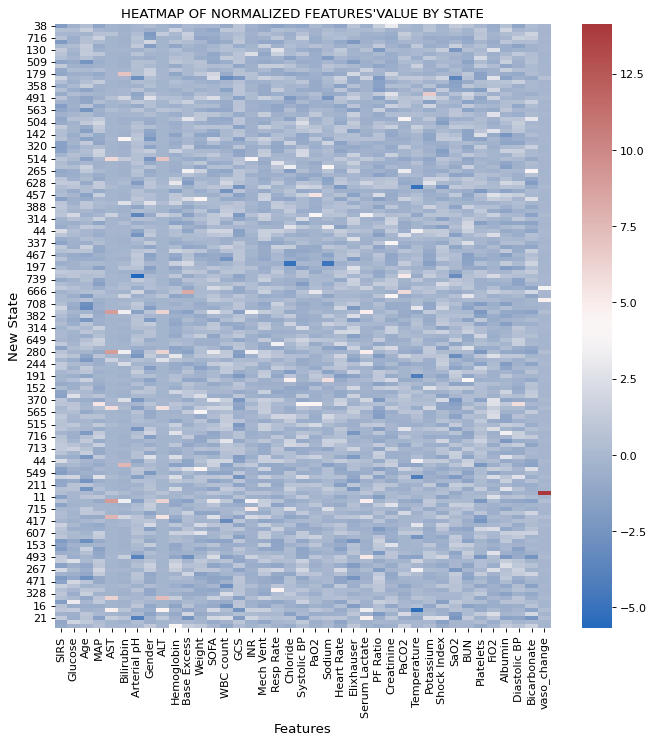

In [23]:
data2_norm=data2.groupby(by=["new_state"]).mean()

data2_norm=NormalizeData(data2_norm)

data2_norm = data2_norm.rename({'sirs_total':"SIRS", 'gluc':"Glucose", 'age':"Age", 'map':"MAP", 'ast':"AST",\
                                'bili':"Bilirubin", 'ph':"Arterial pH", 'gender':"Gender",\
                                'alt':"ALT", 'hgb':"Hemoglobin", 'base_excess':"Base Excess", 'weight':"Weight",\
                                'sofa_total':"SOFA", 'wbc':"WBC count", 'gcs':"GCS", 'inr':"INR",\
                                'mechvent':"Mech Vent", 'rr':"Resp Rate", 'cl':"Chloride", 'sbp':"Systolic BP",\
                                'pao2':"PaO2", 'na':"Sodium", 'hr':"Heart Rate", 'elix':"Elixhauser",'lactate':"Serum Lactate",\
                                'pf_ratio':"PF Ratio", 'creat':"Creatinine", 'paco2':"PaCO2", 'temp':"Temperature",\
                                'k':"Potassium", 'shock_index':"Shock Index",'o2_sat':"SaO2", 'bun':"BUN",\
                                'plt':"Platelets", 'fio2':"FiO2", 'alb':"Albumin", 'dbp':"Diastolic BP",\
                                'bicarb':"Bicarbonate"}, axis=1)
figure(figsize=(10, 10), dpi=80)
sns.heatmap(data2_norm.sample(frac=0.2, replace=True, random_state=1), cmap="vlag")
plt.xlabel('Features',fontsize=12)
plt.ylabel('New State',fontsize=12)
# title
title = "Heatmap of normalized features'value by state".upper()
plt.title(title, loc='center')
plt.show()